___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style='whitegrid')

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
#data=pd.read_csv('/content/drive/MyDrive/Logistic _ Linear regression Exercise/19. Decision Trees and Random Forests/14-K-Nearest-Neighbors/KNN_Project_Data')

In [3]:
data=pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [4]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

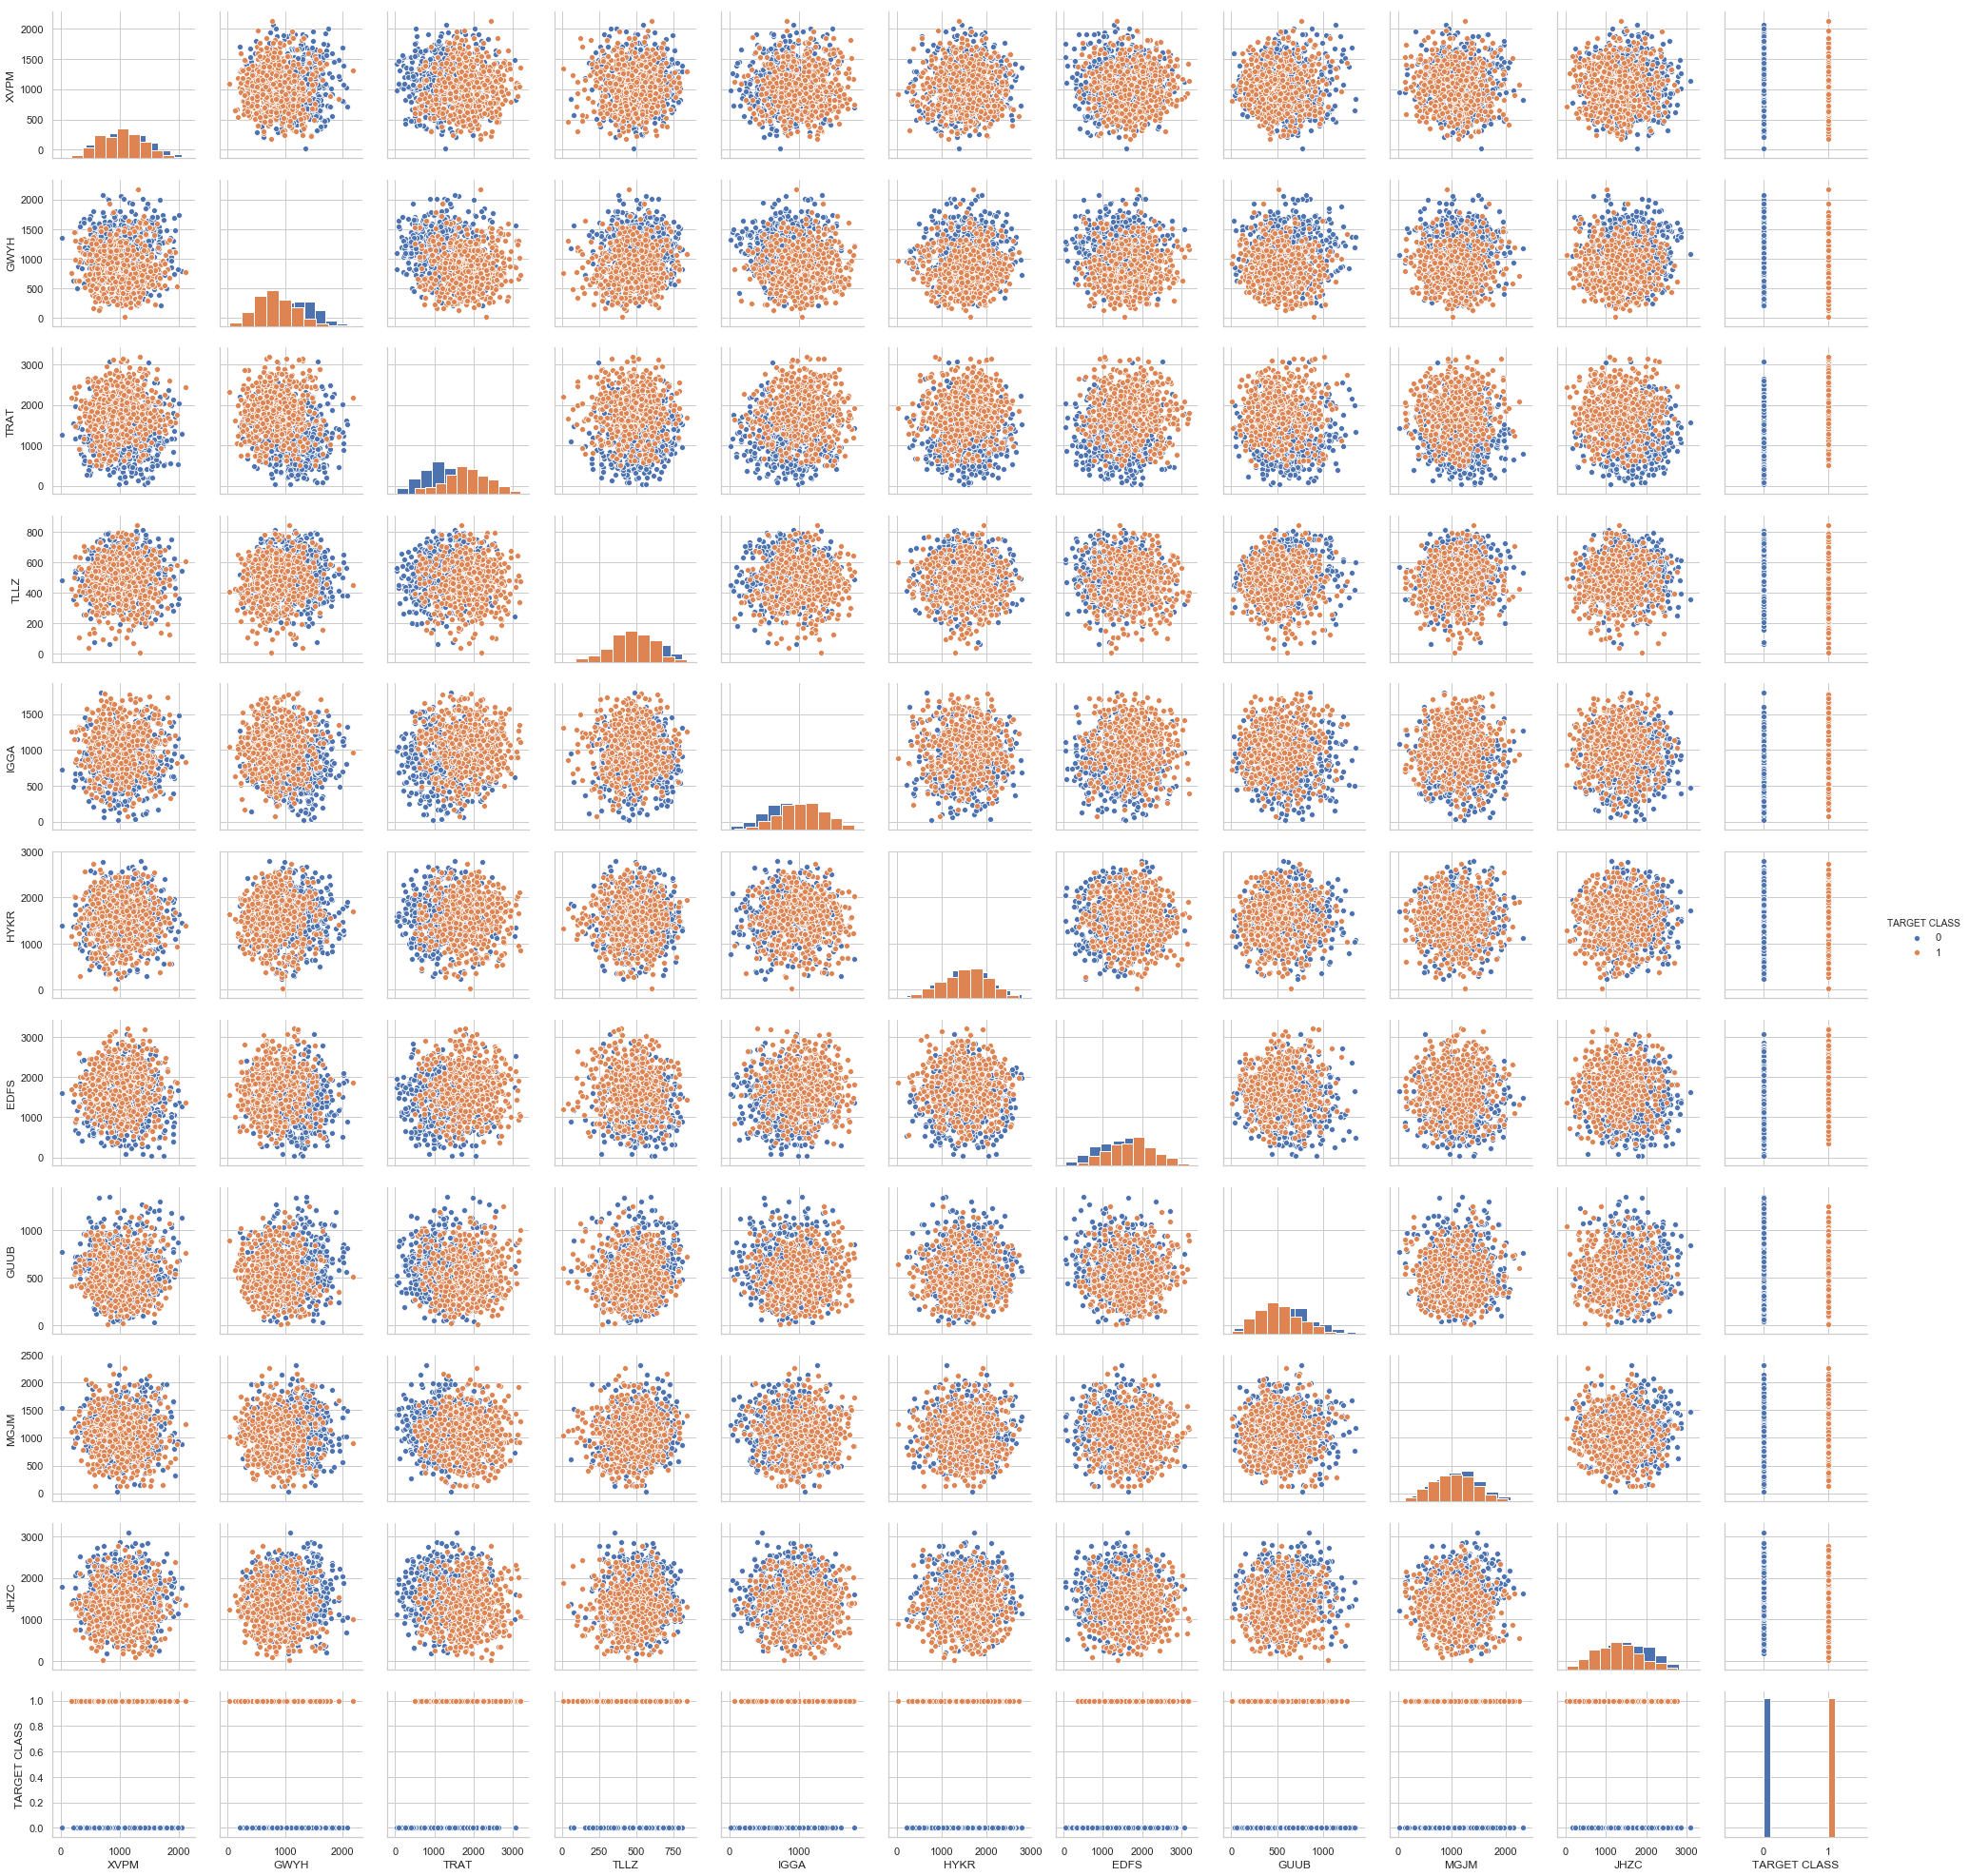

In [6]:
sns.pairplot(data,hue='TARGET CLASS',diag_kind='hist')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [7]:
from sklearn.preprocessing import StandardScaler as ss

** Create a StandardScaler() object called scaler.**

In [8]:
scaler=ss()

** Fit scaler to the features.**

In [9]:
features=data.drop('TARGET CLASS',axis=1)
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
X=scaler.transform(features)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
X_df=pd.DataFrame(X, columns=data.columns[:-1])
Y=data.iloc[:,-1].values

In [12]:
X_df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
5,1.437244,-0.827457,0.847975,-0.914267,-0.102903,1.375667,-1.137473,0.029738,-1.101580,1.240523
6,1.192634,-0.432092,-0.970855,1.238040,0.982445,0.728702,-0.849378,0.616467,-0.956891,-0.641066
7,0.317560,0.446607,-1.677772,-0.347079,0.489673,-1.024006,-0.433190,-1.198889,-0.357902,1.506390
8,-0.581391,0.249681,-1.368313,1.150715,1.703935,-0.059437,-0.266295,-0.519027,0.496928,0.418472
9,-0.071150,-2.014273,-0.778997,-0.462438,0.007273,0.867458,-1.517317,0.777843,0.614484,-0.695004


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
x_train,x_test,y_train,y_test=tts(X,Y, random_state=0,test_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier as knc

**Create a KNN model instance with n_neighbors=1**

In [16]:
model=knc(n_neighbors=1)

**Fit this KNN model to the training data.**

In [17]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [18]:
yhat=model.predict(x_test)

** Create a confusion matrix and classification report.**

In [19]:
import sklearn.metrics as metrics

In [20]:
metrics.confusion_matrix(y_test,yhat)

array([[114,  45],
       [ 31, 110]], dtype=int64)

In [21]:
report=metrics.classification_report(y_test,yhat)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       159
           1       0.71      0.78      0.74       141

   micro avg       0.75      0.75      0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [22]:
k=[] # number of neighbors

error_rate=[] #error recorded
for i in range(1,50):
  models=knc(n_neighbors=i)
  models.fit(x_train,y_train)
  yhat2=models.predict(x_test)
  error_rate.append(np.mean(yhat2 != y_test))
  k.append(i)
 



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.25333333333333335, 0.2733333333333333, 0.20333333333333334, 0.21, 0.20666666666666667, 0.21333333333333335, 0.2, 0.21, 0.23, 0.22666666666666666, 0.22666666666666666, 0.21333333333333335, 0.22333333333333333, 0.21666666666666667, 0.22333333333333333, 0.21333333333333335, 0.22333333333333333, 0.21333333333333335, 0.21, 0.2, 0.22333333333333333, 0.21666666666666667, 0.21666666666666667, 0.21, 0.21, 0.2, 0.20666666666666667, 0.2, 0.21, 0.2, 0.21333333333333335, 0.2, 0.21333333333333335, 0.20666666666666667, 0.22, 0.21, 0.21666666666666667, 0.20333333333333334, 0.21333333333333335, 0.20666666666666667, 0.22, 0.20666666666666667, 0.21666666666666667, 0.20333333333333334, 0.20666666666666667, 0.20666666666666667, 0.20666666666666667, 0.20333333333333334, 0.20333333333333334]


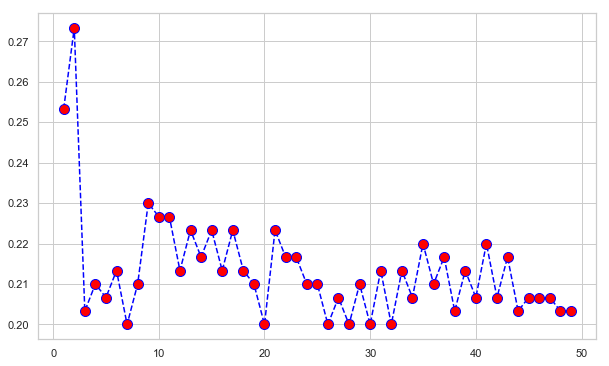

In [23]:
plt.figure(figsize=(10,6))
plt.plot(k,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
print(k)
print(error_rate)

**Now create the following plot using the information from your for loop.**

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [24]:

print ("WITH K = 2 \n")
models=knc(n_neighbors=i)
models.fit(x_train,y_train)
yhat2=models.predict(x_test)
print("confusion matrix=\n\n", metrics.confusion_matrix(y_test,yhat2),'\n')
print("classification report=\n\n", metrics.classification_report(y_test,yhat2) )

WITH K = 2 

confusion matrix=

 [[119  40]
 [ 21 120]] 

classification report=

               precision    recall  f1-score   support

           0       0.85      0.75      0.80       159
           1       0.75      0.85      0.80       141

   micro avg       0.80      0.80      0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# Great Job!